In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset/country-data.csv')

df


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [2]:
num_paises = df['country'].nunique()
print(f"Número de países no dataset: {num_paises}")

Número de países no dataset: 167


In [3]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


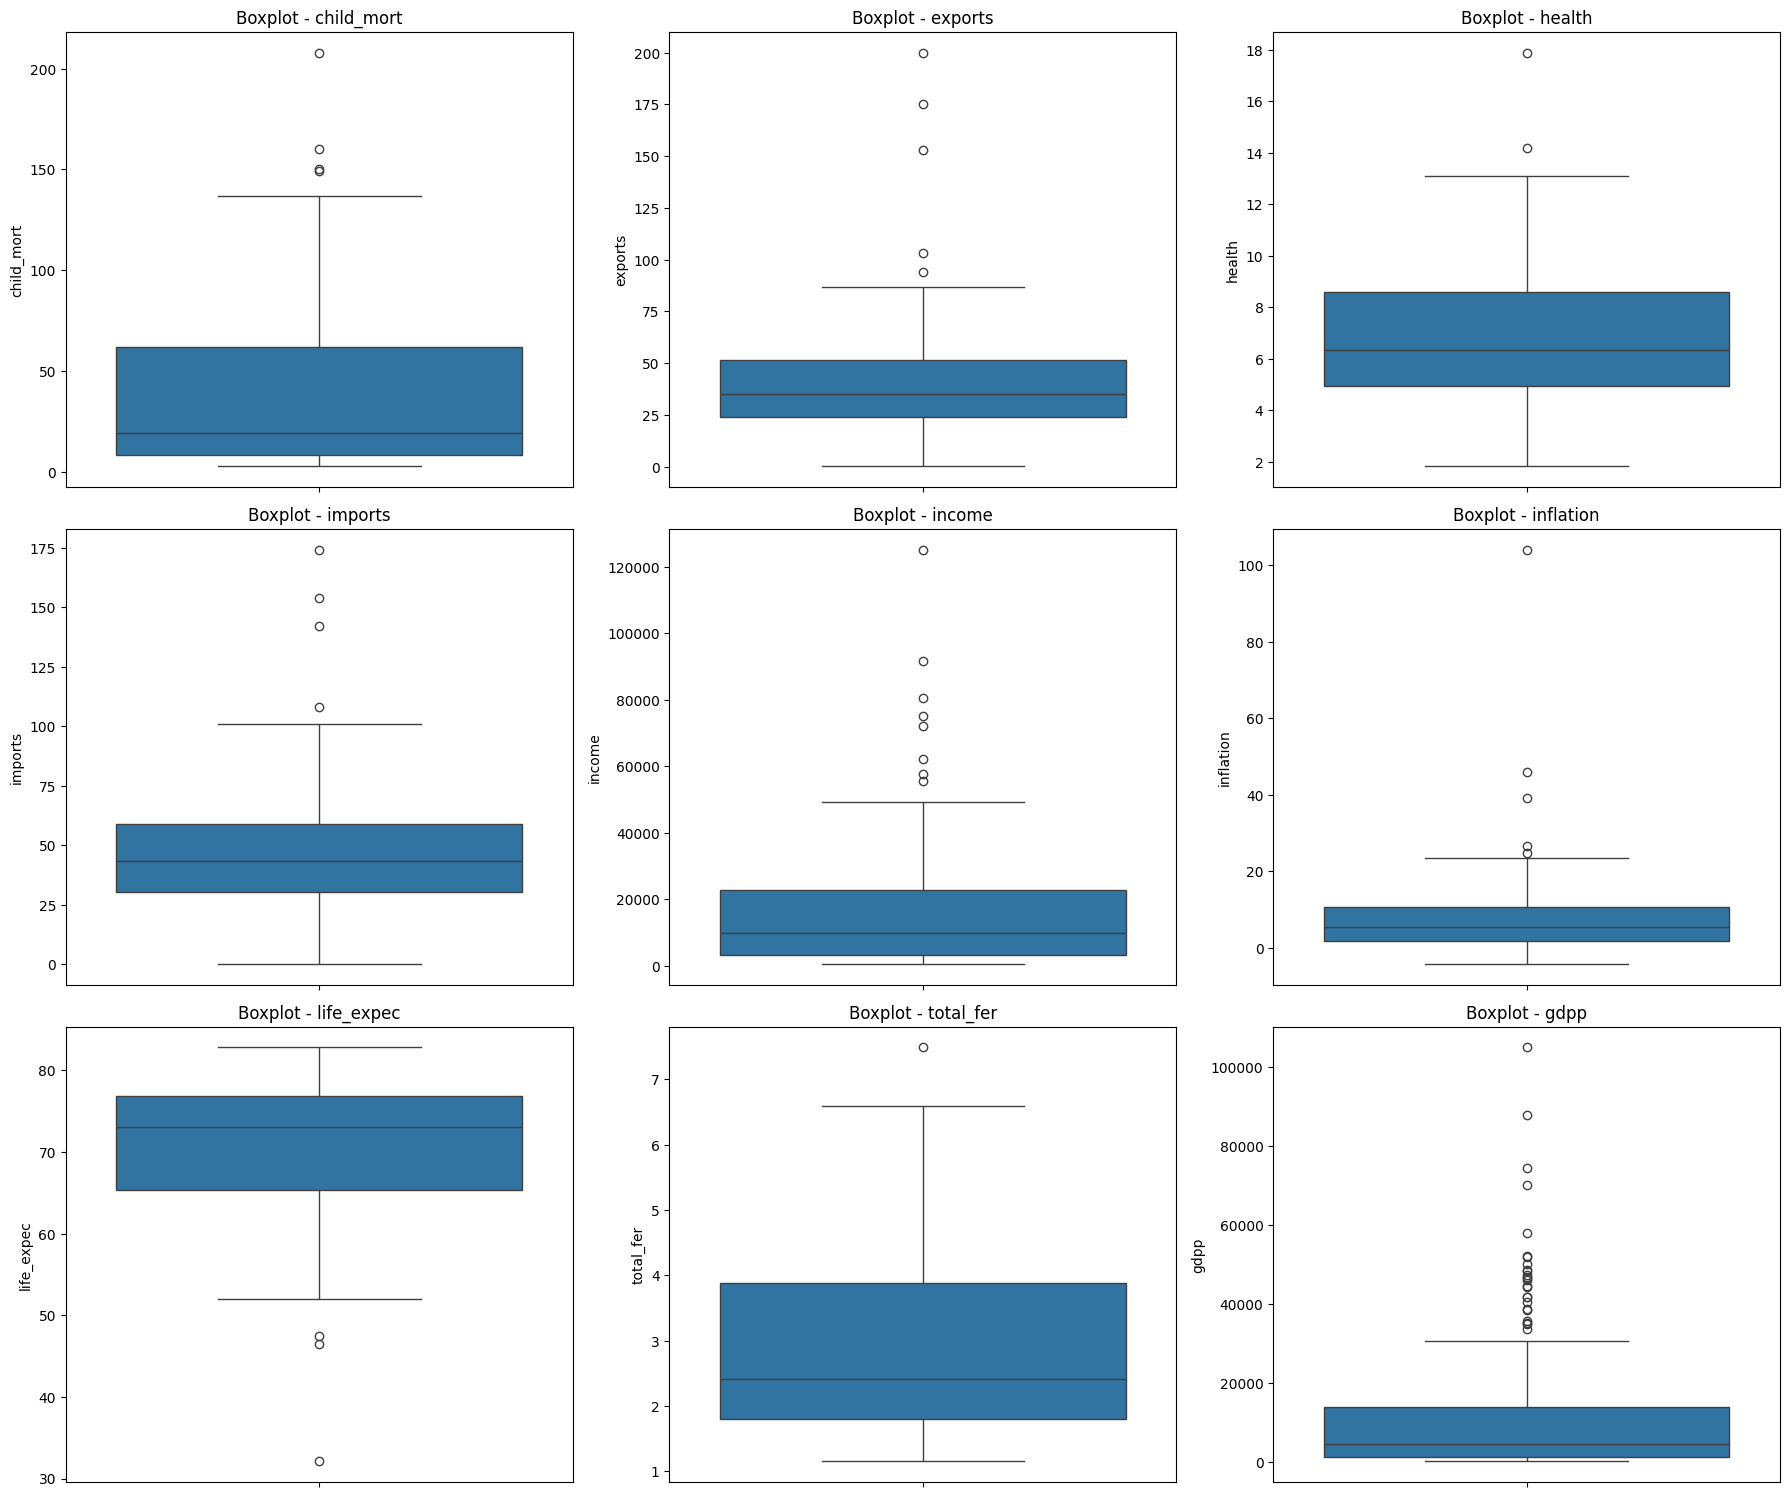

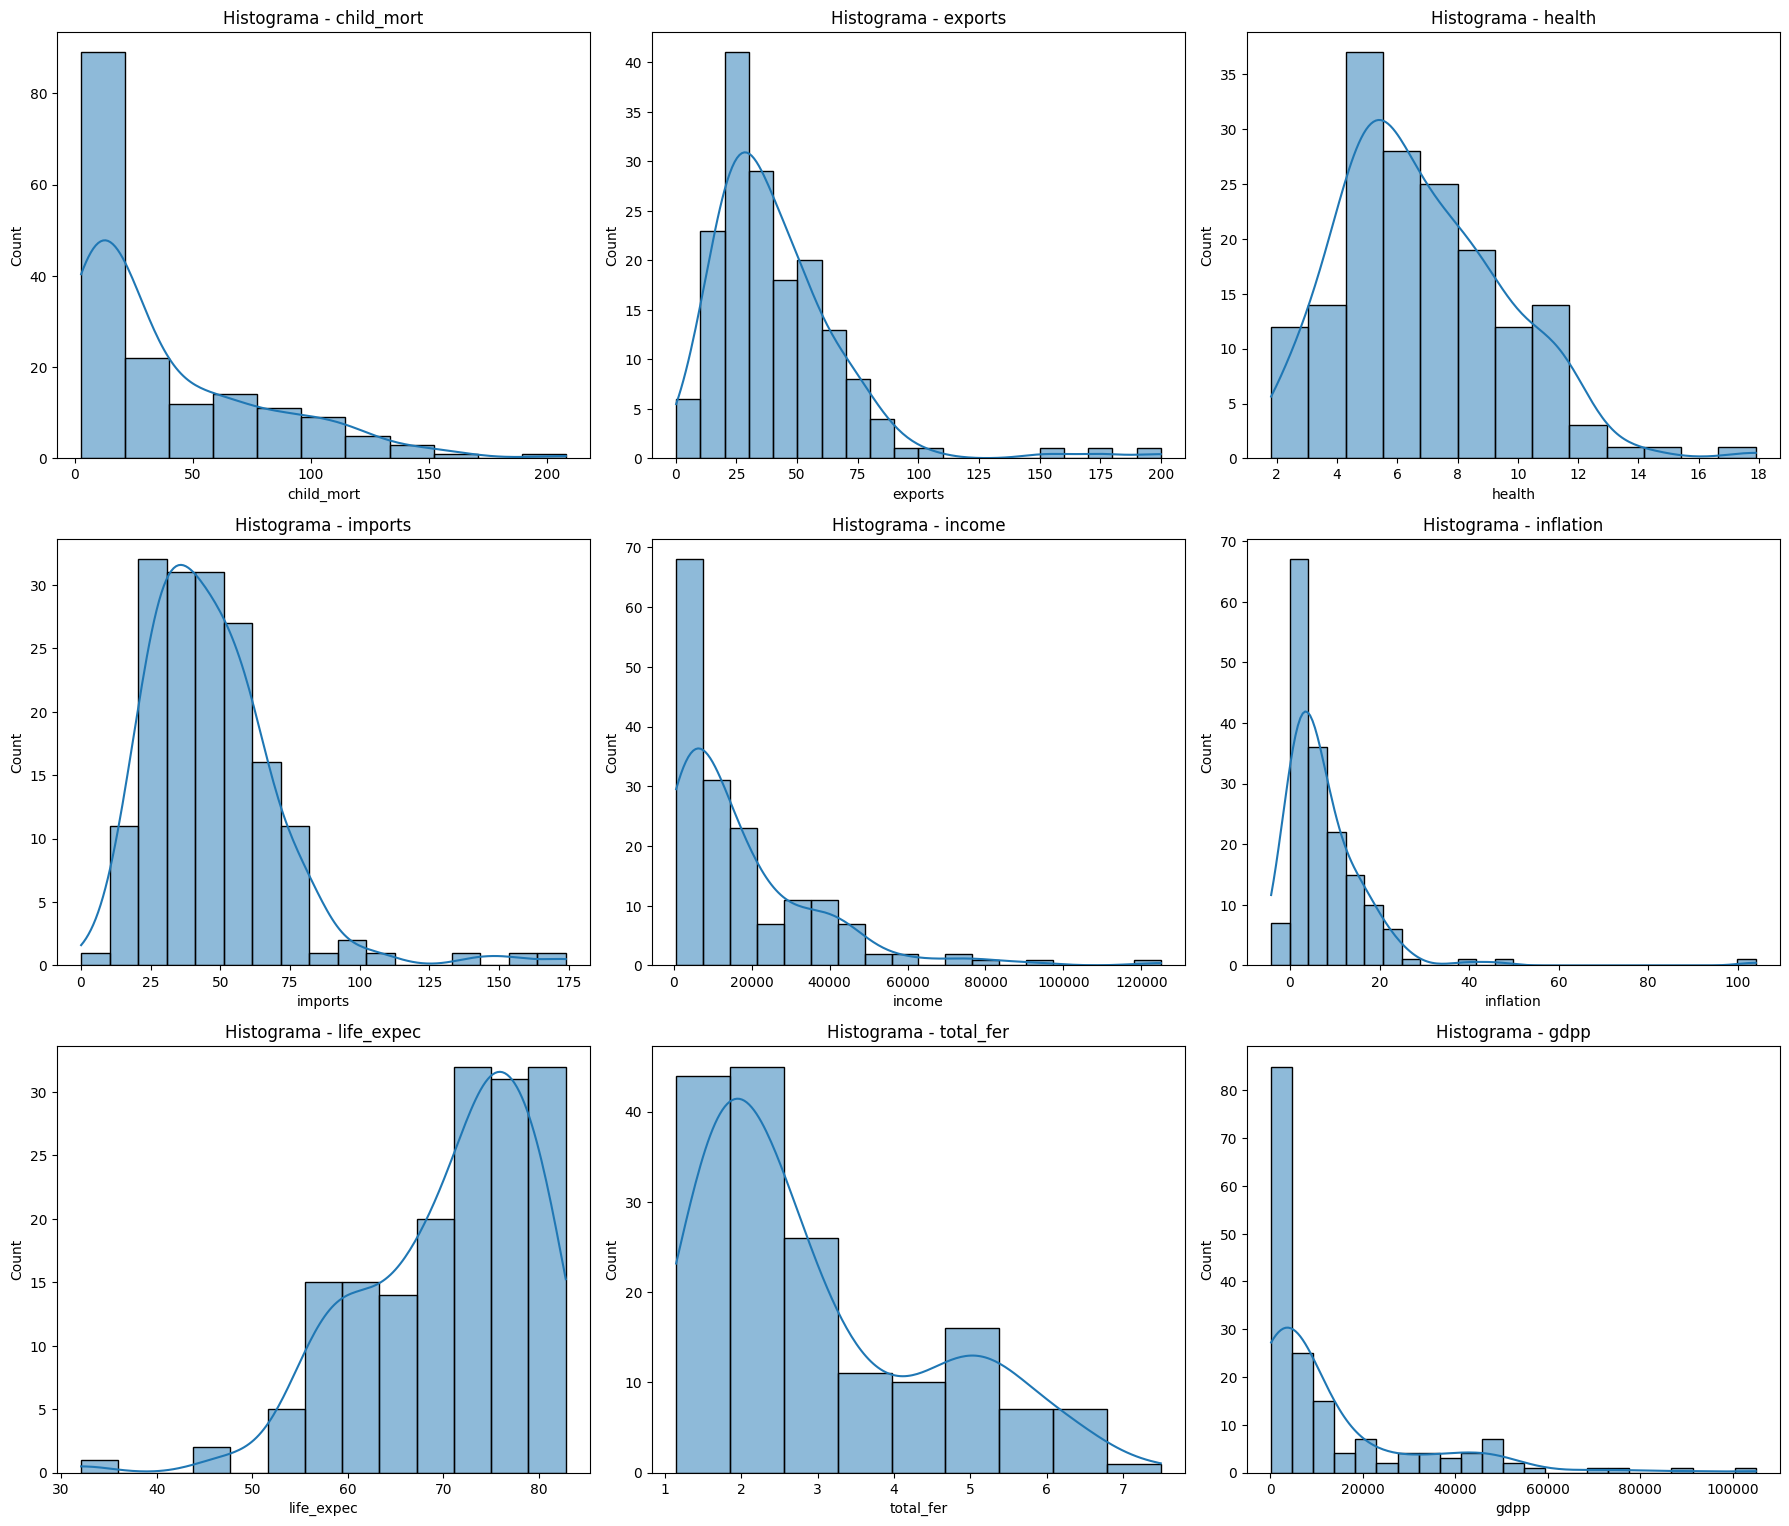

In [4]:
# Remover a coluna 'country' para análise numérica
variaveis = df.columns.drop("country")


plt.figure(figsize=(18, 20))
for i, col in enumerate(variaveis, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot - {col}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 20))
for i, col in enumerate(variaveis, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histograma - {col}")
plt.tight_layout()
plt.show()


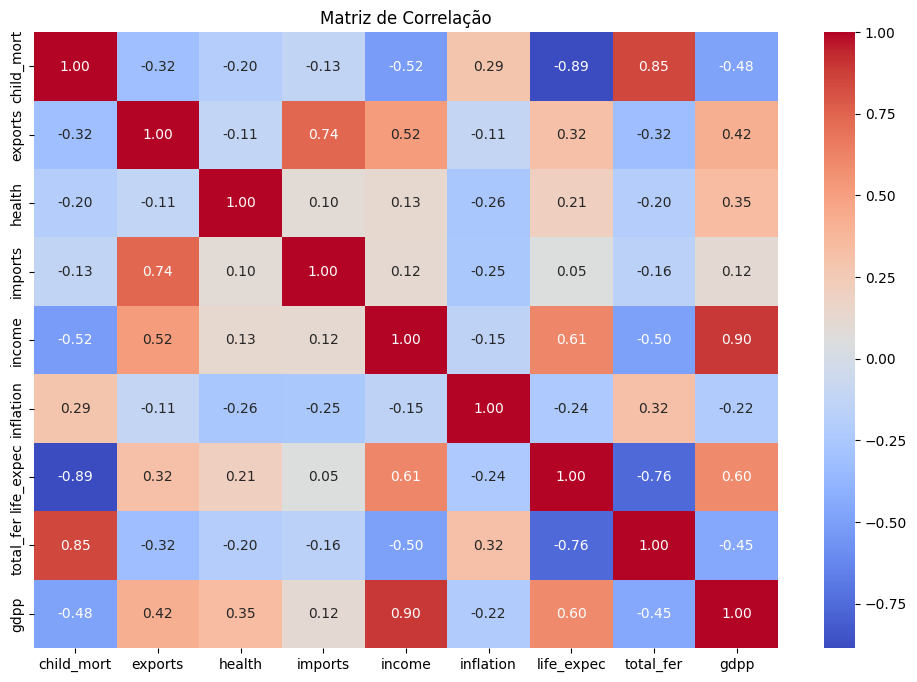

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[variaveis].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


In [16]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats

# Remover coluna 'country'
df_numerico = df.drop(columns=['country'])

numeric_cols = df_numerico.select_dtypes(include=['float64','int64']).columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerico[numeric_cols])


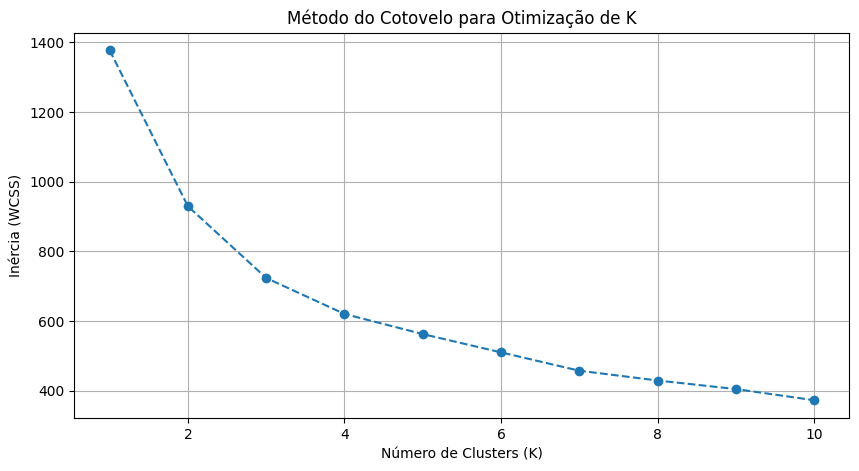

In [8]:

from sklearn.cluster import KMeans

wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo para Otimização de K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia (WCSS)')
plt.grid(True)
plt.show()


In [17]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

k_otimo = 3 

# Ajusta KMeans
kmeans_final = KMeans(
    n_clusters=k_otimo,
    init='k-means++',
    max_iter=300,
    n_init=10,
    random_state=42
)

df_numerico['cluster_label_kmeans'] = kmeans_final.fit_predict(df_scaled)

# Obtendo centróides no espaço normalizado
centroids_scaled = kmeans_final.cluster_centers_

# Convertendo de volta para escala original
centroids_original = scaler.inverse_transform(centroids_scaled)

# Usa apenas as colunas numéricas — NÃO inclui 'country'
numeric_cols = df_numerico.select_dtypes(include=['float64','int64']).columns

centroids_df = pd.DataFrame(centroids_original, columns=numeric_cols)
centroids_df['cluster_label'] = centroids_df.index

# Exportação
centroids_df.to_csv('kmeans_centroids.csv', index=False)

print(f"✅ Clusterização K-Means concluída com K={k_otimo}.")
print("\nCentróides dos Clusters (Valores Originais):")
display(centroids_df)


✅ Clusterização K-Means concluída com K=3.

Centróides dos Clusters (Valores Originais):


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
0,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444,0
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979,1
2,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381,2


✅ Países Representativos (Mais Próximos do Centróide - K-Means):

Cluster 0: Iceland (Distância: 0.7318)
Cluster 1: Guinea (Distância: 0.8291)
Cluster 2: Jamaica (Distância: 0.7344)


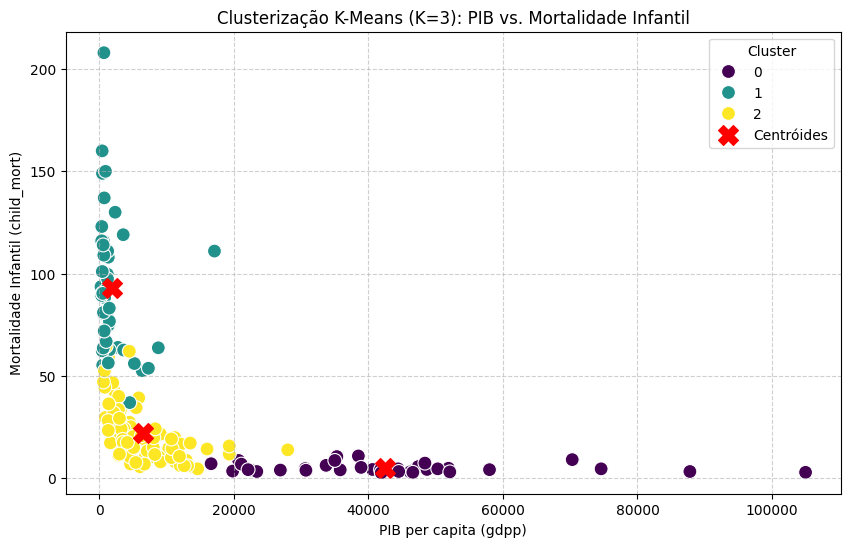

In [18]:

import seaborn as sns
import matplotlib.pyplot as plt

df_scaled_with_labels = pd.DataFrame(df_scaled, columns=numeric_cols)
df_scaled_with_labels['cluster_label'] = df_numerico['cluster_label_kmeans'].values

representative_countries = {}

for i in range(k_otimo):
    cluster_data_scaled = df_scaled_with_labels[df_scaled_with_labels['cluster_label'] == i].drop(columns=['cluster_label'])
    
    centroid = centroids_scaled[i]  
    
    distances = np.sum((cluster_data_scaled.values - centroid)**2, axis=1)
    
    closest_index = distances.argmin()

    country_name = df.iloc[cluster_data_scaled.index[closest_index]]['country']
    
    representative_countries[i] = {
        'country': country_name,
        'distance': np.sqrt(distances.min())
    }

print("✅ Países Representativos (Mais Próximos do Centróide - K-Means):\n")
for cluster, info in representative_countries.items():
    print(f"Cluster {cluster}: {info['country']} (Distância: {info['distance']:.4f})")


# Visualização dos Clusters (PIB vs. Mortalidade Infantil)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='gdpp', 
    y='child_mort', 
    hue='cluster_label_kmeans', 
    data=df_numerico,
    palette='viridis', 
    s=100
)

plt.scatter(
    centroids_df['gdpp'], 
    centroids_df['child_mort'],
    marker='X', 
    s=200, 
    color='red', 
    label='Centróides'
)

plt.title(f'Clusterização K-Means (K={k_otimo}): PIB vs. Mortalidade Infantil')
plt.xlabel('PIB per capita (gdpp)')
plt.ylabel('Mortalidade Infantil (child_mort)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster')
plt.show()


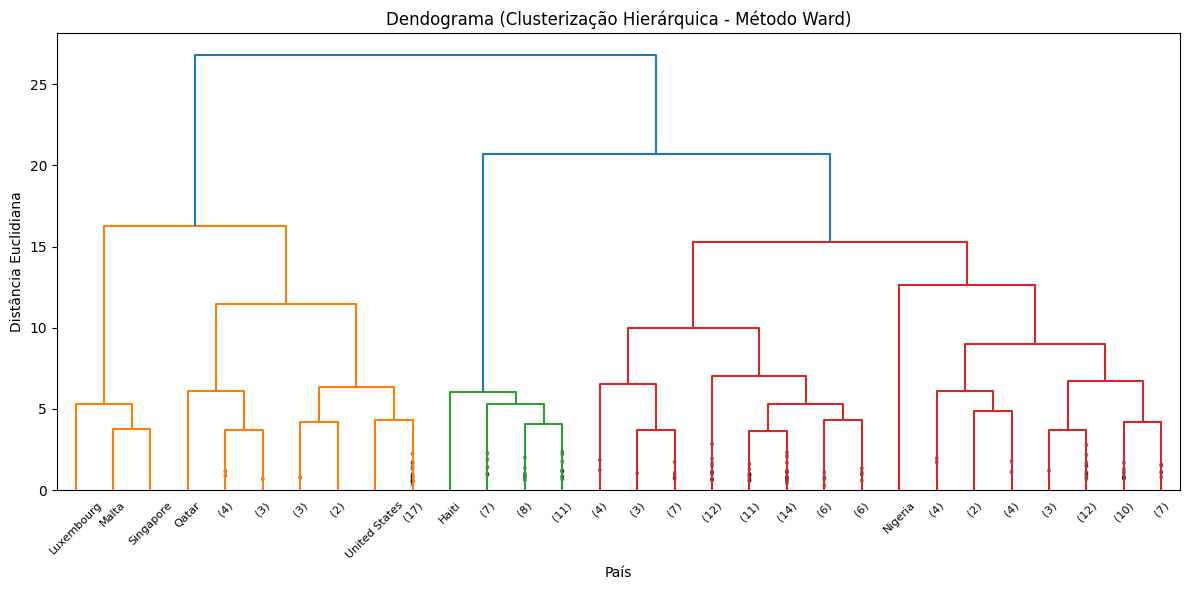

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

labels = df.loc[df_numerico.index, 'country'].values

Z = linkage(df_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    show_leaf_counts=True,
    leaf_rotation=45,
    leaf_font_size=8,
    show_contracted=True,
    labels=labels
)
plt.title('Dendograma (Clusterização Hierárquica)')
plt.xlabel('País')
plt.ylabel('Distância Euclidiana')
plt.tight_layout()
plt.show()

# 3. Adicionar os clusters hierárquicos AO MESMO df usado no linkage
df_numerico['cluster_label_hierarchical'] = fcluster(Z, t=k_otimo, criterion='maxclust')


In [20]:
print("Tabela de Comparação (K-Means (Linha) vs. Hierárquica (Coluna)):")

comparacao = pd.crosstab(
    df_numerico['cluster_label_kmeans'],
    df_numerico['cluster_label_hierarchical'],
    rownames=['K-Means'],
    colnames=['Hierárquica']
)

display(comparacao)

Tabela de Comparação (K-Means (Linha) vs. Hierárquica (Coluna)):


Hierárquica,1,2,3
K-Means,,,
0,31,0,5
1,0,27,20
2,3,0,81


In [24]:
import numpy as np
import pandas as pd

df_numerico = df_numerico.reset_index(drop=True)


X = df_scaled  
n_samples = X.shape[0]
n_features = X.shape[1]
K = k_otimo    # = 3

np.random.seed(42)
initial_indices = np.random.choice(n_samples, size=K, replace=False)
medoid_indices = initial_indices.copy()

print("Medóides iniciais:", medoid_indices)


def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))


max_iter = 100
for iteration in range(max_iter):
    print(f"\n--- Iteração {iteration+1} ---")
    

    clusters = [[] for _ in range(K)]
    
    for idx in range(n_samples):

        distances = [euclidean_distance(X[idx], X[medoid_idx]) for medoid_idx in medoid_indices]
        cluster_id = np.argmin(distances)
        clusters[cluster_id].append(idx)
    
    new_medoid_indices = medoid_indices.copy()
    
    for k in range(K):
        cluster_points = clusters[k]
        if len(cluster_points) == 0:
            continue
        
        total_distances = []
        for i in cluster_points:
            dist_sum = np.sum([euclidean_distance(X[i], X[j]) for j in cluster_points])
            total_distances.append(dist_sum)
        
        new_medoid = cluster_points[np.argmin(total_distances)]
        new_medoid_indices[k] = new_medoid
    
    print("Medóides anteriores:", medoid_indices)
    print("Medóides recalculados:", new_medoid_indices)
    
    if np.array_equal(new_medoid_indices, medoid_indices):
        print("✅ Convergência atingida. Medóides não mudaram.")
        break
    
    medoid_indices = new_medoid_indices.copy()

print("\nMedóides finais:", medoid_indices)


medoid_countries = df.loc[df_numerico.index[medoid_indices], 'country'].values

print("\n✅ Medóides finais (representantes dos clusters em TODAS as iterações):")
for i, country in enumerate(medoid_countries):
    print(f"Cluster {i}: {country}")


Medóides iniciais: [101 108  78]

--- Iteração 1 ---
Medóides anteriores: [101 108  78]
Medóides recalculados: [101  59 121]

--- Iteração 2 ---
Medóides anteriores: [101  59 121]
Medóides recalculados: [ 81  59 121]

--- Iteração 3 ---
Medóides anteriores: [ 81  59 121]
Medóides recalculados: [ 81  59 121]
✅ Convergência atingida. Medóides não mudaram.

Medóides finais: [ 81  59 121]

✅ Medóides finais (representantes dos clusters em TODAS as iterações):
Cluster 0: Kiribati
Cluster 1: Ghana
Cluster 2: Poland
